In [1]:
import json
import numpy as np
from itertools import product
from glob import glob
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
with open("../data/2022/input/skf/stratification/stratification.json", 'r') as fd:
    splits = json.load(fd)

In [3]:
splits.keys(), splits["20221021"].keys(), splits["20221021"]["honeypot"][0][1][:5]

(dict_keys(['20221021', '20221022', '20221023', '20221024', '20221025', '20221026', '20221027', '20221028', '20221029', '20221030', '20221031']),
 dict_keys(['darknet', 'honeypot']),
 ['117.187.173.104',
  '222.185.146.149',
  '117.196.109.167',
  '170.106.173.40',
  '123.130.210.226'])

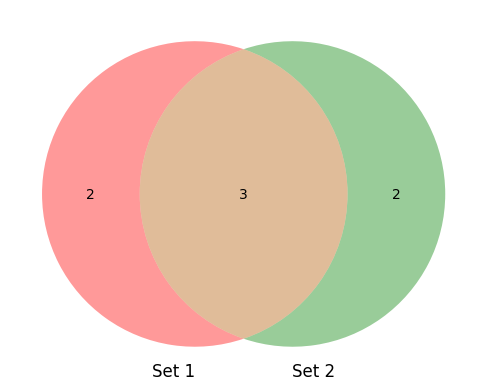

In [4]:
# Sample data for two sets
set1 = {1, 2, 3, 4, 5}
set2 = {3, 4, 5, 6, 7}

# Create a Venn diagram
venn2([set1, set2], set_labels=("Set 1", "Set 2"))

In [10]:
iters = product(np.arange(10), [0, 1])
day = "20221021"

In [13]:
plt.figure(figsize=(24, 24))
for pidx , (fold, train_test) in enumerate(iters):
    darknet = splits[day]["darknet"][fold][train_test]
    honeypot = splits[day]["honeypot"][fold][train_test]
    plt.subplot(5, 4, pidx + 1)
    venn2([set(darknet), set(honeypot)], set_labels=("Darknet", "Honeypot"))
    train_test_label = "train" if train_test == 0 else "test"
    plt.title(f"{day} / {fold} / {train_test_label}")
plt.savefig(f"../pdfs/charts/venn_{day}.pdf")

<Figure size 2400x2400 with 0 Axes>

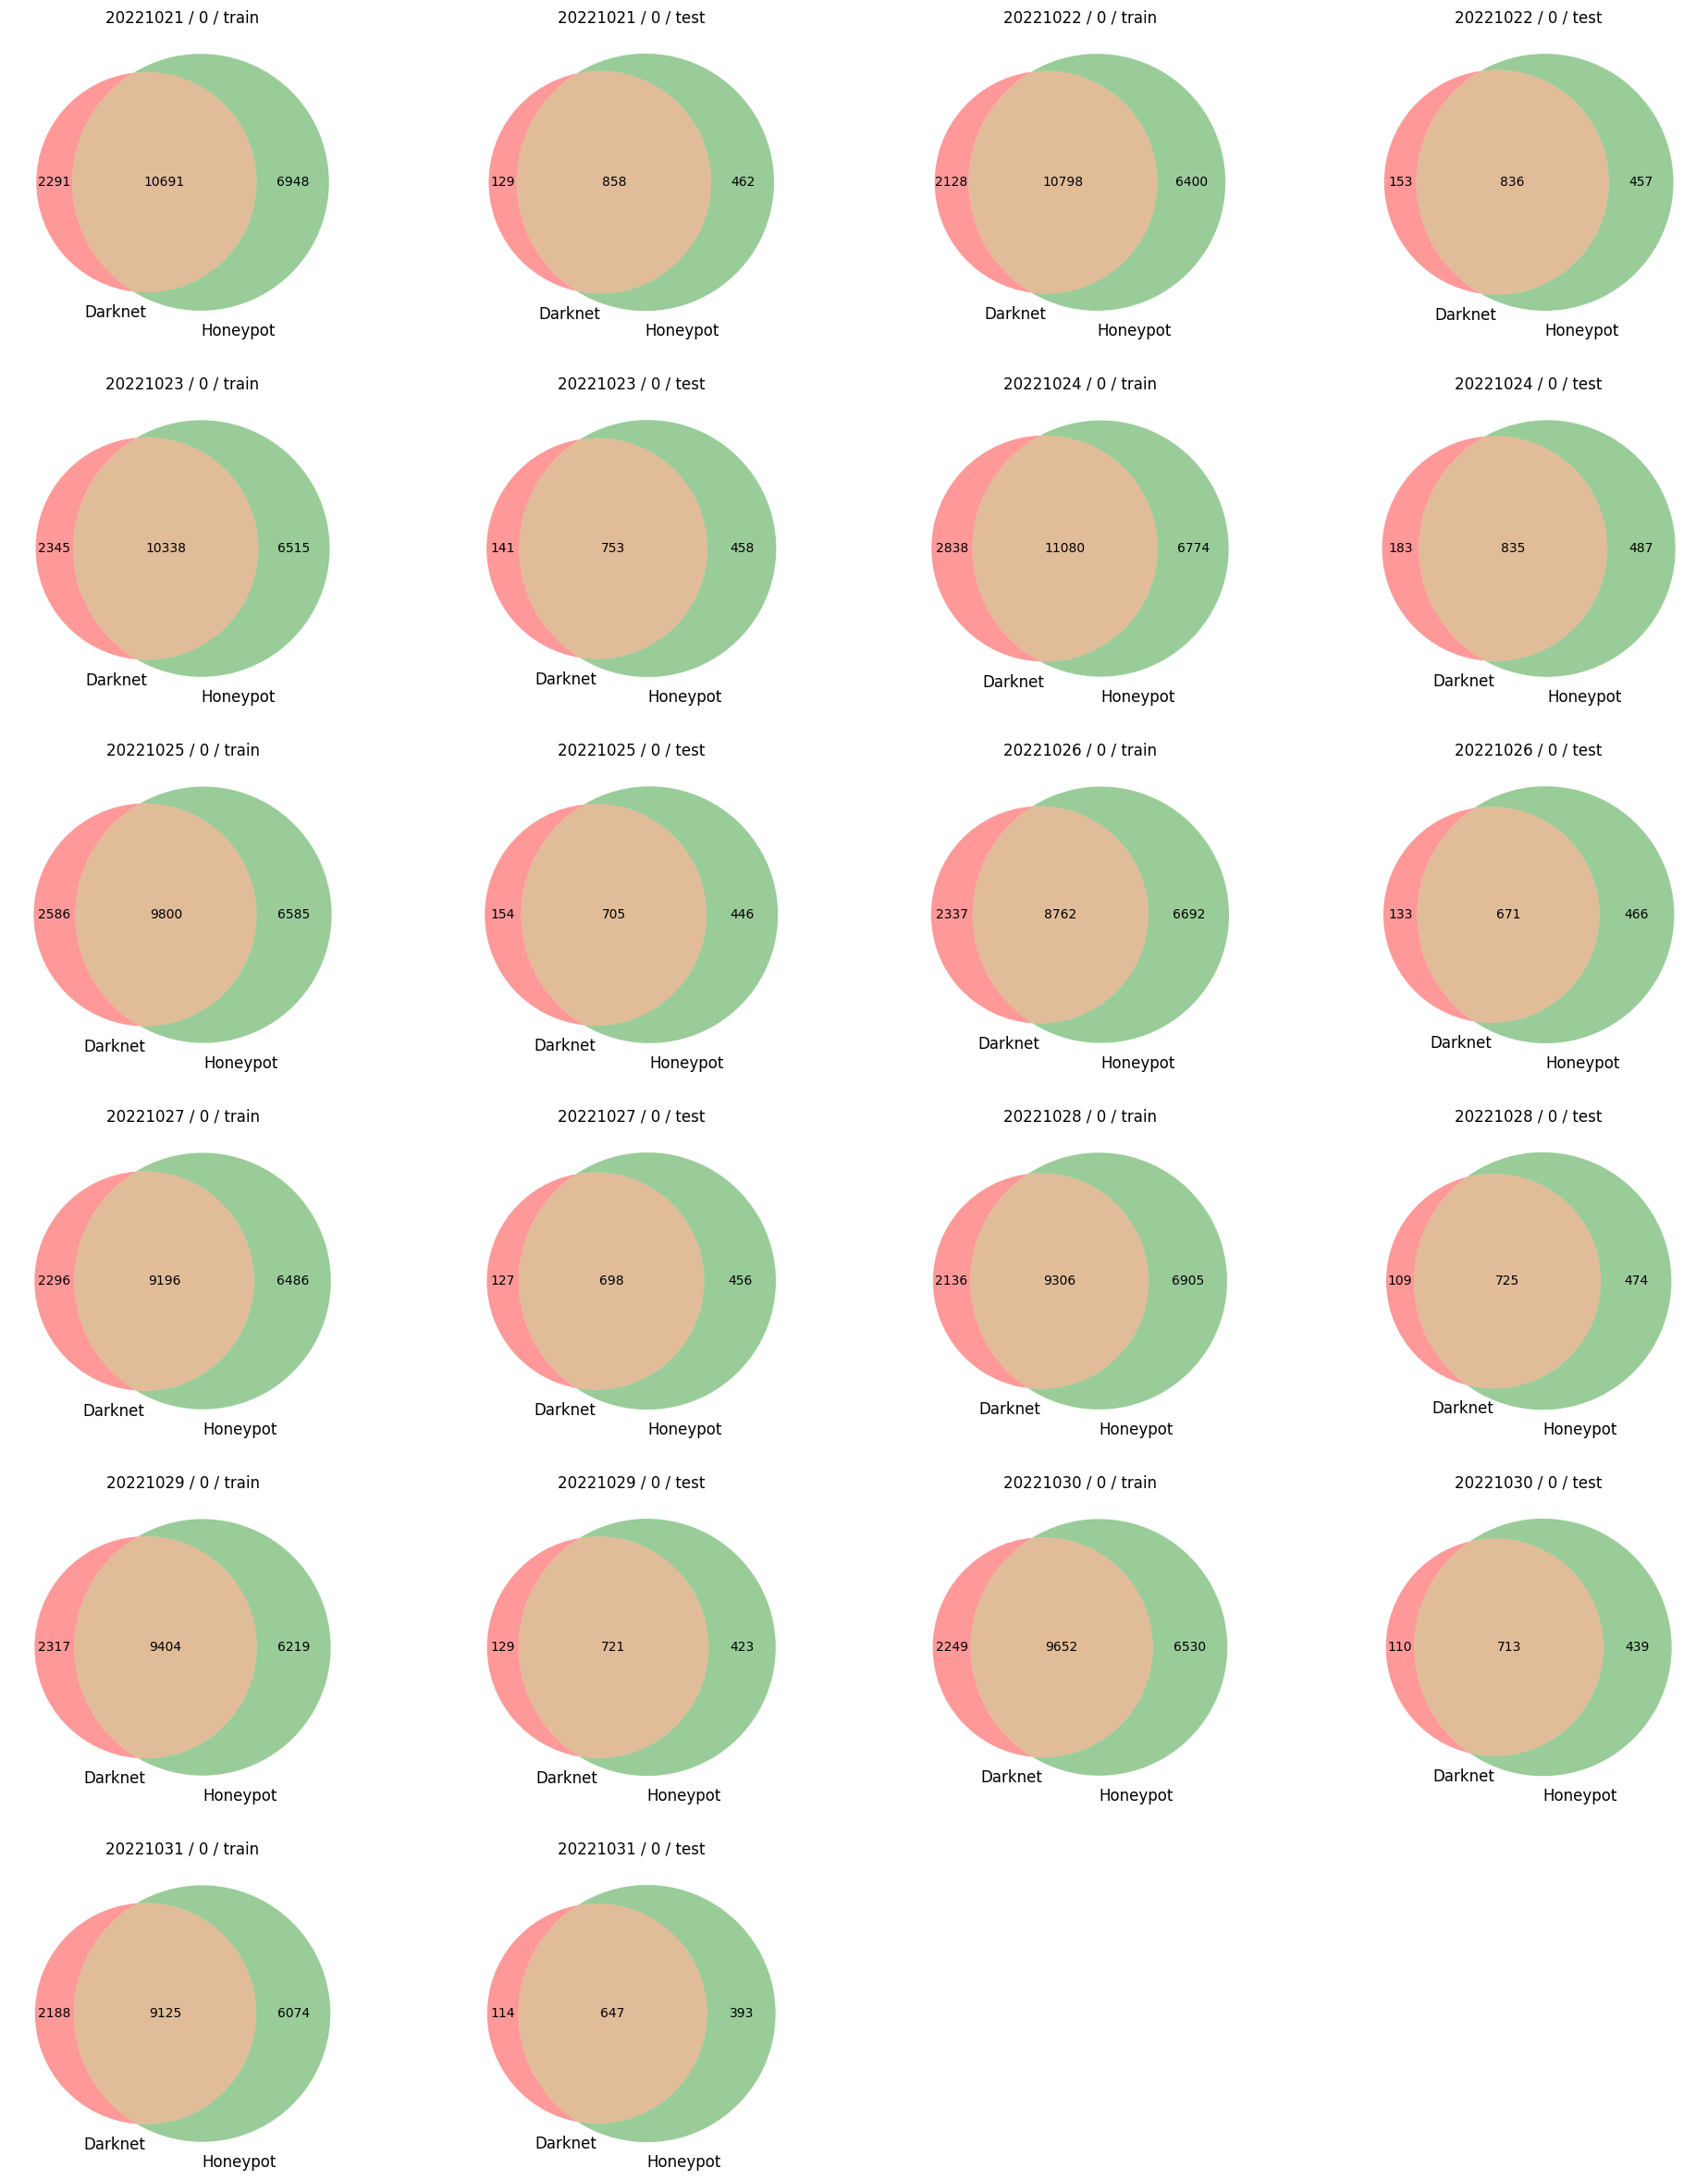

In [15]:
days = sorted([ f.split('/')[-1].split('_')[-2] for f in glob(f"../data/2022/input/stacking_predictions/out/k3/darknet/test/idarkvec*_fold00.csv") ])
iters = product(days, [0, 1])
fold = 0
plt.figure(figsize=(24, 30))
for pidx, (day, train_test) in enumerate(iters):
    darknet = splits[day]["darknet"][fold][train_test]
    honeypot = splits[day]["honeypot"][fold][train_test]
    plt.subplot(6, 4, pidx + 1)
    venn2([set(darknet), set(honeypot)], set_labels=("Darknet", "Honeypot"))
    train_test_label = "train" if train_test == 0 else "test"
    plt.title(f"{day} / {fold} / {train_test_label}")
plt.savefig("../pdfs/charts/venn_days.pdf")